# Life Expectancy (WHO)

# Data Pre-Processing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataset = pd.read_csv("data.csv")
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
dataset.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [8]:
dataset.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
dataset.isnull().sum()



Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

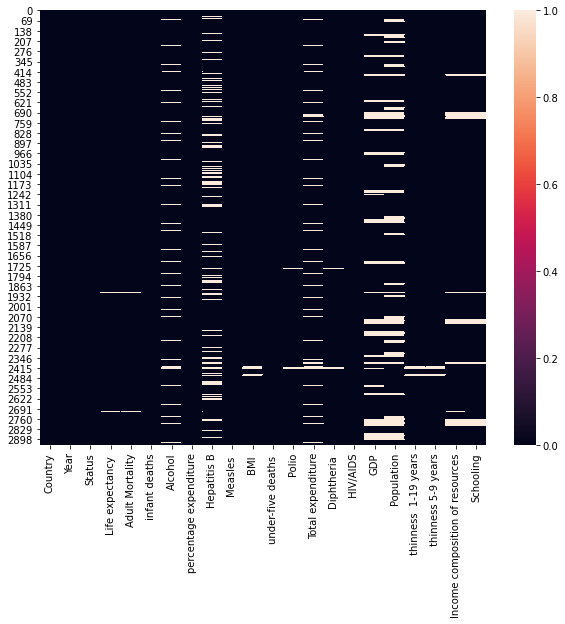

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull())

In [11]:
dataset['Life expectancy ']=dataset['Life expectancy '].fillna(value=dataset['Life expectancy '].mean())
dataset['Adult Mortality']=dataset['Adult Mortality'].fillna(value=dataset['Adult Mortality'].mean())

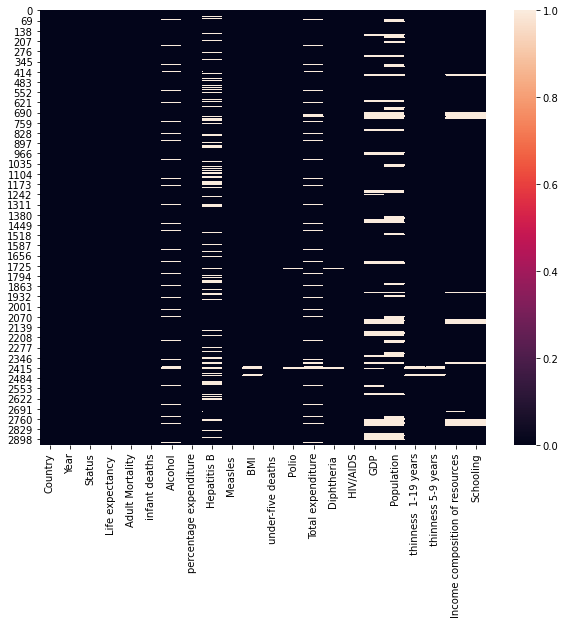

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull())

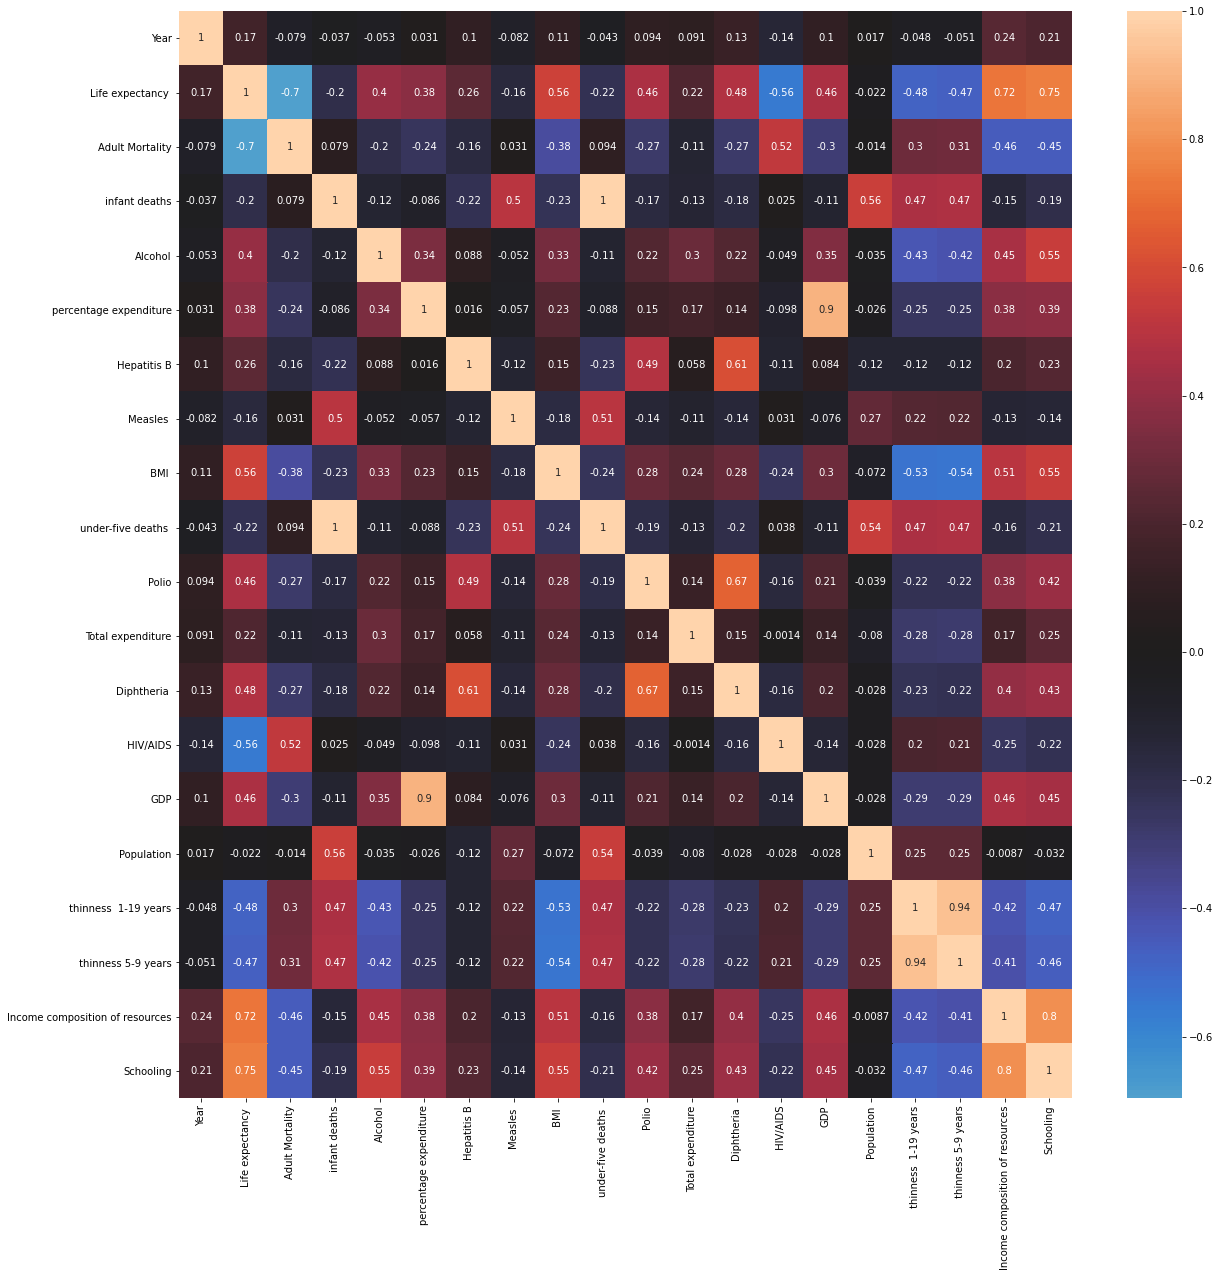

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True, center=0)

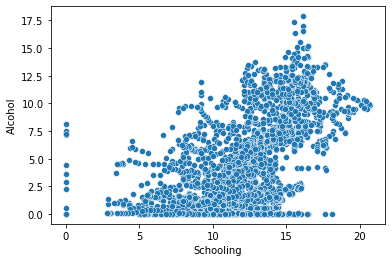

In [14]:
sns.scatterplot(x=dataset['Schooling'],y=dataset['Alcohol'])

In [15]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
dataset['Alcohol']=dataset[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

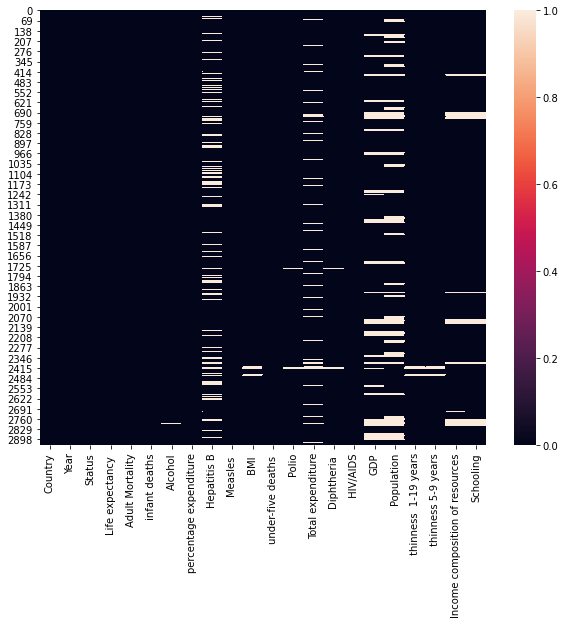

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull())

In [17]:
dataset['Alcohol']=dataset['Alcohol'].fillna(value=dataset['Alcohol'].mean())

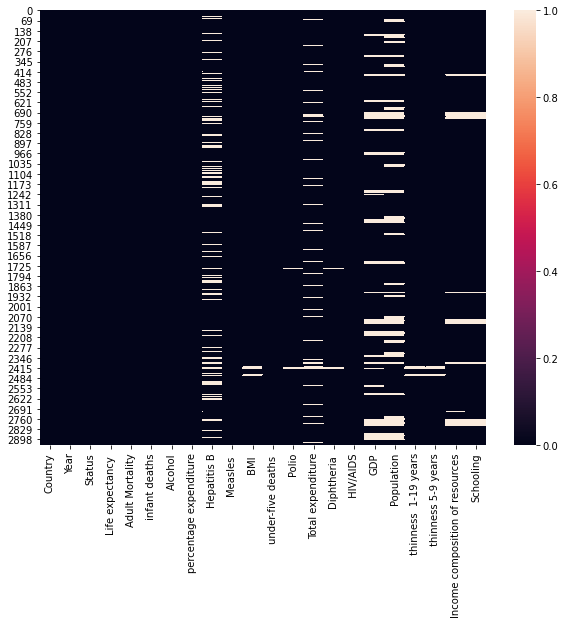

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull())

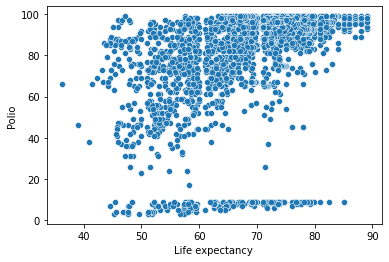

In [19]:
sns.scatterplot(x=dataset['Life expectancy '],y=dataset['Polio'])

In [20]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
dataset['Polio']=dataset[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

In [21]:
dataset['Diphtheria ']=dataset['Diphtheria '].fillna(value=dataset['Diphtheria '].mean())

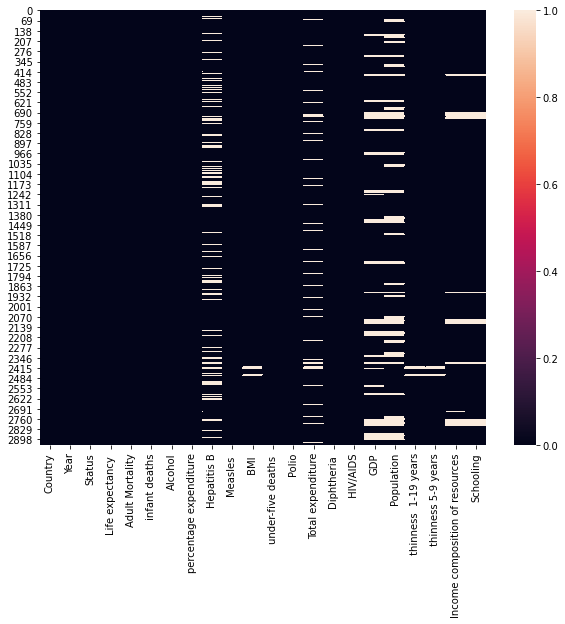

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull())

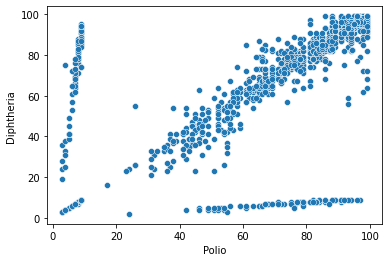

In [23]:
sns.scatterplot(x=dataset['Polio'],y=dataset['Diphtheria '])

In [24]:
dataset[dataset['Diphtheria ']>80.0]['Hepatitis B'].mean()

88.39503507825148

In [25]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
dataset['Hepatitis B']=dataset[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

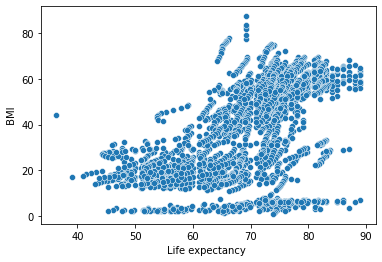

In [26]:
sns.scatterplot(x=dataset['Life expectancy '],y=dataset[' BMI '])

In [27]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
dataset[' BMI ']=dataset[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

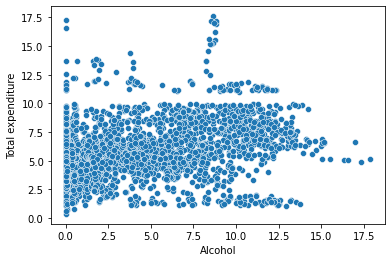

In [28]:
sns.scatterplot(y=dataset['Total expenditure'],x=dataset['Alcohol'])

In [29]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
dataset['Total expenditure']=dataset[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

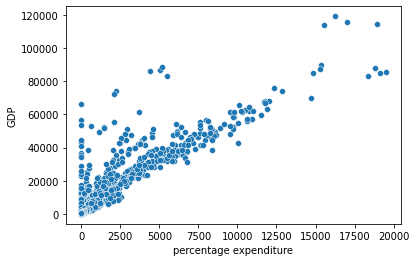

In [30]:
sns.scatterplot(x=dataset['percentage expenditure'],y=dataset['GDP'])

In [31]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g

dataset['GDP']=dataset[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

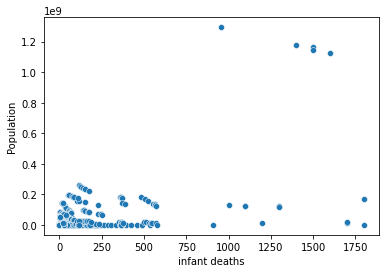

In [32]:
sns.scatterplot(x=dataset['infant deaths'],y=dataset['Population'])

In [33]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
dataset['Population']=dataset[['Population','infant deaths']].apply(impute_population,axis=1)

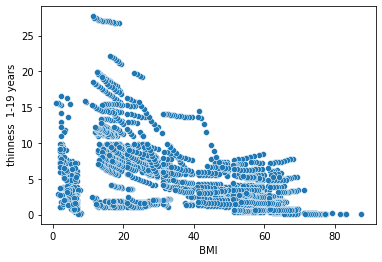

In [34]:
sns.scatterplot(x=dataset[' BMI '],y=dataset[' thinness  1-19 years']);

In [35]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
dataset[' thinness  1-19 years']=dataset[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

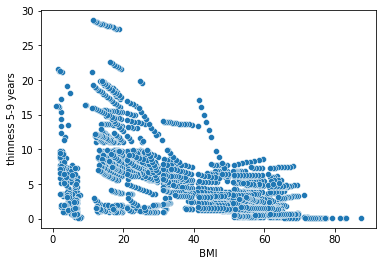

In [36]:
sns.scatterplot(x=dataset[' BMI '],y=dataset[' thinness 5-9 years'])

In [37]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
dataset[' thinness 5-9 years']=dataset[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

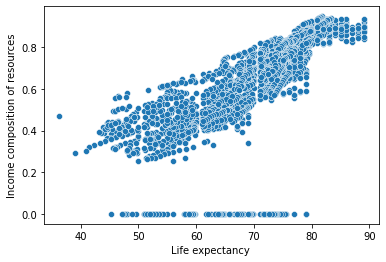

In [38]:
sns.scatterplot(x=dataset['Life expectancy '],y=dataset['Income composition of resources'])

In [39]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
dataset['Income composition of resources']=dataset[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)

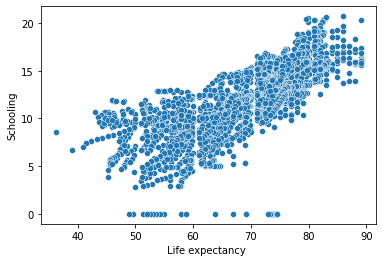

In [40]:
sns.scatterplot(x=dataset['Life expectancy '],y=dataset['Schooling'])

In [41]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
dataset['Schooling']=dataset[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [42]:
dataset[(dataset['Life expectancy ']>80) & (dataset['Life expectancy ']<=90)]['Schooling'].mean()

16.509881422924906

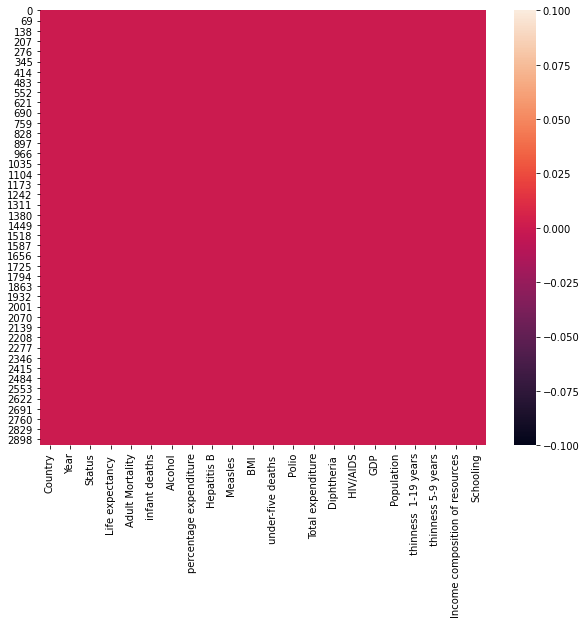

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull())

In [44]:
dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [45]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [46]:
dataset = dataset.drop(['Year','Country'],axis=1)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   object 
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2938 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  Diphtheria          

In [48]:
Y=dataset['Life expectancy ']
X=dataset.drop('Life expectancy ',axis=1)


In [49]:
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)

In [50]:
X=pd.concat([X,status_dummy],axis=1)
X.shape

(2938, 20)

# Train Test Slpiting

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [52]:
# !pip install -U scikit-learn

In [53]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape


# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model =LinearRegression()
model.fit(X_train, Y_train)
Y_pred1= model.predict(X_test)
Y_pred2= model.predict(X_train)
print("="*100)
print("LinearRegression Train Root Mean Squared error:", np.sqrt(mse(Y_train, Y_pred2)))
print("LinearRegression Train Accuracy:", (1-mape(Y_train, Y_pred2))*100)
print("*"*100)
print("LinearRegression Test Root Mean Squared error:", np.sqrt(mse(Y_test, Y_pred1)))
print("LinearRegression Test Accuracy:", (1-mape(Y_test, Y_pred1))*100)
print("="*100)

LinearRegression Train Root Mean Squared error: 3.849971323633596
LinearRegression Train Accuracy: 95.58069423824571
****************************************************************************************************
LinearRegression Test Root Mean Squared error: 3.8949967918795805
LinearRegression Test Accuracy: 95.63923377354925


# Support Vector Regression

In [56]:
from sklearn.svm import SVR

In [57]:
model =SVR()
model.fit(X_train, Y_train)
Y_pred1= model.predict(X_test)
Y_pred2= model.predict(X_train)
print("="*100)
print("SVR Train Root Mean Squared error:", np.sqrt(mse(Y_train, Y_pred2)))
print("SVR Train Accuracy:", (1-mape(Y_train, Y_pred2))*100)
print("*"*100)
print("SVR Test Root Mean Squared error:", np.sqrt(mse(Y_test, Y_pred1)))
print("SVR Test Accuracy:", (1-mape(Y_test, Y_pred1))*100)
print("="*100)

SVR Train Root Mean Squared error: 9.809785543173684
SVR Train Accuracy: 87.89246904464152
****************************************************************************************************
SVR Test Root Mean Squared error: 9.702956012944774
SVR Test Accuracy: 88.05129892754181


# Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model =RandomForestRegressor()
model.fit(X_train, Y_train)
Y_pred1= model.predict(X_test)
Y_pred2= model.predict(X_train)
print("="*100)
print("RandomForestRegressor Train Root Mean Squared error:", np.sqrt(mse(Y_train, Y_pred2)))
print("RandomForestRegressor Train Accuracy:", (1-mape(Y_train, Y_pred2))*100)
print("*"*100)
print("RandomForestRegressor Test Root Mean Squared error:", np.sqrt(mse(Y_test, Y_pred1)))
print("RandomForestRegressor Test Accuracy:", (1-mape(Y_test, Y_pred1))*100)
print("="*100)

RandomForestRegressor Train Root Mean Squared error: 0.6814313503738995
RandomForestRegressor Train Accuracy: 99.36400740624876
****************************************************************************************************
RandomForestRegressor Test Root Mean Squared error: 1.9568733847789264
RandomForestRegressor Test Accuracy: 98.18878750104942


#   Decision Tree Regressor




In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
model =DecisionTreeRegressor()
model.fit(X_train, Y_train)
Y_pred1= model.predict(X_test)
Y_pred2= model.predict(X_train)
print("="*100)
print("DecisionTreeRegressor Train Root Mean Squared error:", np.sqrt(mse(Y_train, Y_pred2)))
print("DecisionTreeRegressor Train Accuracy:", (1-mape(Y_train, Y_pred2))*100)
print("*"*100)
print("DecisionTreeRegressor Test Root Mean Squared error:", np.sqrt(mse(Y_test, Y_pred1)))
print("DecisionTreeRegressor Test Accuracy:", (1-mape(Y_test, Y_pred1))*100)
print("="*100)

DecisionTreeRegressor Train Root Mean Squared error: 2.538732250238583e-16
DecisionTreeRegressor Train Accuracy: 100.0
****************************************************************************************************
DecisionTreeRegressor Test Root Mean Squared error: 2.8043972378750044
DecisionTreeRegressor Test Accuracy: 97.40611448843049


# Ada Boost Regressor




In [62]:
from sklearn.ensemble import AdaBoostRegressor

In [63]:
model =AdaBoostRegressor()
model.fit(X_train, Y_train)
Y_pred1= model.predict(X_test)
Y_pred2= model.predict(X_train)
print("="*100)
print("AdaBoostRegressor Train Root Mean Squared error:", np.sqrt(mse(Y_train, Y_pred2)))
print("AdaBoostRegressor Train Accuracy:", (1-mape(Y_train, Y_pred2))*100)
print("*"*100)
print("AdaBoostRegressor Test Root Mean Squared error:", np.sqrt(mse(Y_test, Y_pred1)))
print("AdaBoostRegressor Test Accuracy:", (1-mape(Y_test, Y_pred1))*100)
print("="*100)

AdaBoostRegressor Train Root Mean Squared error: 2.9417844613885595
AdaBoostRegressor Train Accuracy: 96.43917700149959
****************************************************************************************************
AdaBoostRegressor Test Root Mean Squared error: 3.142964310863347
AdaBoostRegressor Test Accuracy: 96.28132484279271


# Gradient Boosting Regressor




In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
model =GradientBoostingRegressor()
model.fit(X_train, Y_train)
Y_pred1= model.predict(X_test)
Y_pred2= model.predict(X_train)
print("="*100)
print("GradientBoostingRegressor Train Root Mean Squared error:", np.sqrt(mse(Y_train, Y_pred2)))
print("GradientBoostingRegressor Train Accuracy:", (1-mape(Y_train, Y_pred2))*100)
print("*"*100)
print("GradientBoostingRegressor Test Root Mean Squared error:", np.sqrt(mse(Y_test, Y_pred1)))
print("GradientBoostingRegressor Test Accuracy:", (1-mape(Y_test, Y_pred1))*100)
print("="*100)

GradientBoostingRegressor Train Root Mean Squared error: 1.7985196986768721
GradientBoostingRegressor Train Accuracy: 98.07898476903196
****************************************************************************************************
GradientBoostingRegressor Test Root Mean Squared error: 2.32169547898239
GradientBoostingRegressor Test Accuracy: 97.5605154787626


# Neural Networks

In [66]:
import tensorflow as tf

In [67]:
tf.__version__

'2.4.1'

## Adding Layers

In [68]:
ann = tf.keras.models.Sequential()

In [69]:
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

In [70]:
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

In [71]:
ann.add(tf.keras.layers.Dense(units=1))

## Compiling the ANN

In [72]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Training the ANN model on the Training set

In [75]:
ann.fit(X_train, Y_train, batch_size = 64, epochs = 100)

Epoch 1/100
37/37 [==============================] - 0s 1ms/step - loss: 5003929.5000
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 8767206.0000
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 2159923.7500
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 2402070.0000
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 1549167.5000
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 2864116.2500
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 5130376.5000
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 817888.8750
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 2995239.0000
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 11005075.0000
Epoch 11/100
37/37 [==============================] - 0s 1ms/step - loss: 261073504.0000
Epoch 12/100
37/37 [==============================

## Accuracy

In [76]:
y_pred1 = ann.predict(X_test)
y_pred = ann.predict(X_test)

In [77]:
print("="*100)
print("ANN Train Root Mean Squared error:", np.sqrt(mse(Y_train, Y_pred2)))
print("ANN Train Accuracy:", (1-mape(Y_train, Y_pred2))*100)
print("*"*100)
print("ANN Test Root Mean Squared error:", np.sqrt(mse(Y_test, Y_pred1)))
print("ANN Test Accuracy:", (1-mape(Y_test, Y_pred1))*100)
print("="*100)

ANN Train Root Mean Squared error: 1.7985196986768721
ANN Train Accuracy: 98.07898476903196
****************************************************************************************************
ANN Test Root Mean Squared error: 2.32169547898239
ANN Test Accuracy: 97.5605154787626
